# Airbnb  - EDA

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

file_path = "./1730285881-Airbnb_Open_Data.xlsx"
df = pd.read_excel(file_path)
print("Loaded dataframe with shape:", df.shape)


Loaded dataframe with shape: (102599, 26)


In [13]:
display(df.head())

print('\n----- df.info() -----\n')
df.info()

print('\n----- df.describe() (numeric) -----\n')
display(df.describe(include='all').head())

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN



----- df.info() -----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
count,1.025990e+05,102329,1.025990e+05,102310,102191,102570,102583,102591.000000,102591.000000,102067,...,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000,47756,2
unique,NaN,61280,NaN,2,13189,7,224,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975,1
top,NaN,Home away from home,NaN,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,NaN,NaN,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,House Rules 1. Check-in is 4 pm local time. If...,41662/AL
freq,NaN,33,NaN,51200,881,43792,7937,NaN,NaN,102067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,904,2
mean,2.914623e+07,NaN,4.925411e+10,NaN,NaN,NaN,NaN,40.728094,-73.949644,NaN,...,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254,NaN,NaN


In [14]:

# Missing values summary
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing>0]
display(missing.head(30))

# Duplicates
print('\nNumber of duplicate rows:', df.duplicated().sum())
# Optionally drop exact duplicates (kept commented)
# df = df.drop_duplicates()


license                           102597
house_rules                        54843
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            408
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 270
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
dtype: int64


Number of duplicate rows: 541


Room type value counts:


room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64

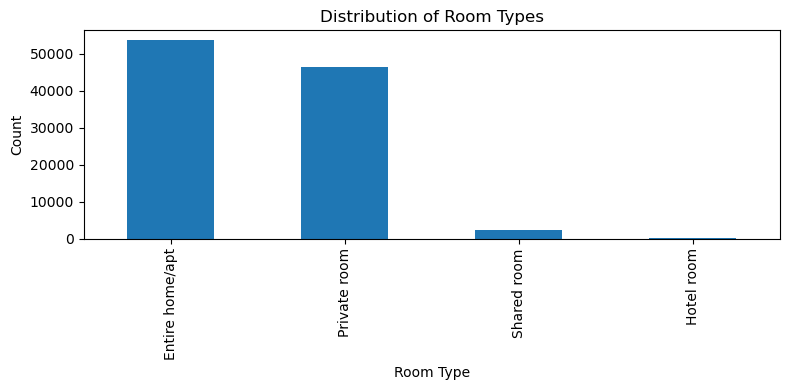

In [15]:

# 1) Different property/room types distribution
print("Room type value counts:")
display(df['room type'].value_counts(dropna=False))

plt.figure(figsize=(8,4))
df['room type'].value_counts().plot(kind='bar')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64


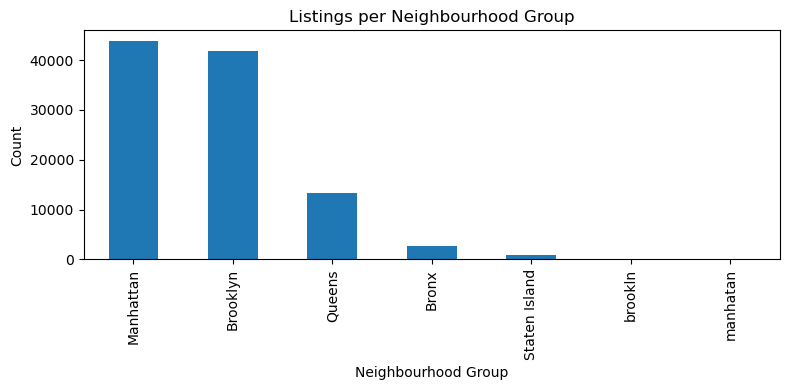

In [16]:

# 2) Which neighbourhood group has the highest number of listings?
nc = df['neighbourhood group'].value_counts(dropna=True)
print(nc)
plt.figure(figsize=(8,4))
nc.plot(kind='bar')
plt.title('Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


neighbourhood group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64

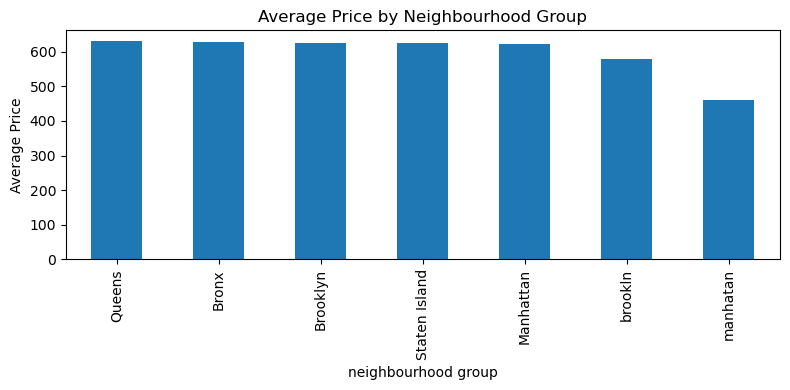

In [17]:

# 3) Average price by neighbourhood group
# Convert price to numeric if needed (remove currency symbols/spaces)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
display(avg_price)
plt.figure(figsize=(8,4))
avg_price.plot(kind='bar')
plt.title('Average Price by Neighbourhood Group')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


Entries with both construction year and price: 102142


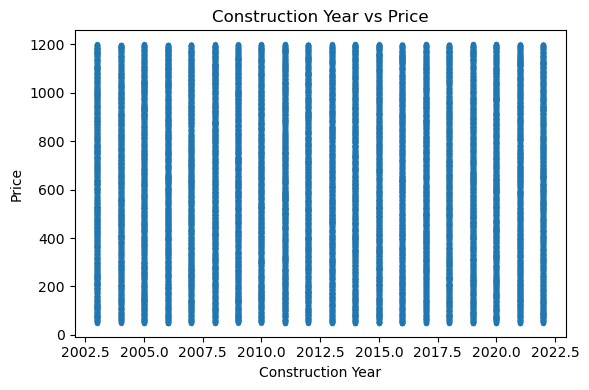

In [18]:

# 4) Relationship between Construction year and price (basic scatter)
# Ensure Construction year is numeric
df['Construction year'] = pd.to_numeric(df['Construction year'], errors='coerce')
sub = df[['Construction year','price']].dropna()
print("Entries with both construction year and price:", len(sub))
plt.figure(figsize=(6,4))
plt.scatter(sub['Construction year'], sub['price'], alpha=0.3, s=8)
plt.title('Construction Year vs Price')
plt.xlabel('Construction Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [19]:

# 5) Top 10 hosts by calculated host listings count (or host id frequency if absent)
if 'calculated host listings count' in df.columns:
    top_hosts = df.groupby(['host id'])['calculated host listings count'].max().sort_values(ascending=False).head(10)
else:
    top_hosts = df['host id'].value_counts().head(10)
print("Top 10 hosts (host id -> listings):")
display(top_hosts)


Top 10 hosts (host id -> listings):


host id
59913507223    332.0
80832323346    332.0
87944211655    332.0
61667701835    332.0
94944787862    332.0
69623510966    332.0
53394556356    332.0
10572530839    332.0
3231719861     332.0
72619494405    332.0
Name: calculated host listings count, dtype: float64

host_identity_verified
verified       3.286684
unconfirmed    3.271767
Name: review rate number, dtype: float64

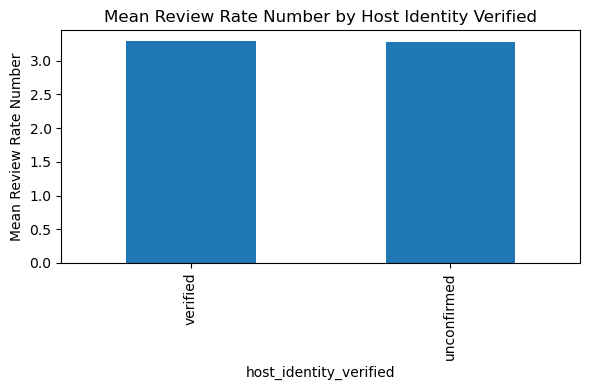

In [20]:

# 6) Are hosts with verified identities more likely to receive positive reviews?
# We'll compare mean 'review rate number' by host_identity_verified
if 'review rate number' in df.columns:
    ver_compare = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False)
    display(ver_compare)
    plt.figure(figsize=(6,4))
    ver_compare.plot(kind='bar')
    plt.title('Mean Review Rate Number by Host Identity Verified')
    plt.ylabel('Mean Review Rate Number')
    plt.tight_layout()
    plt.show()
else:
    print("No 'review rate number' column found for comparison.")


Entries with price & service fee: 102113
Correlation (price vs service fee): 0.9999908755543345


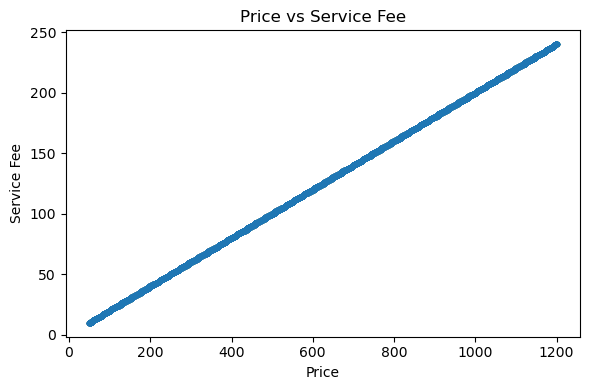

In [21]:

# 7) Correlation between price and service fee (basic)
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')
sub = df[['price','service fee']].dropna()
print("Entries with price & service fee:", len(sub))
print("Correlation (price vs service fee):", sub['price'].corr(sub['service fee']))

plt.figure(figsize=(6,4))
plt.scatter(sub['price'], sub['service fee'], alpha=0.3, s=8)
plt.title('Price vs Service Fee')
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.tight_layout()
plt.show()


In [22]:

# 8) Average review rate number by neighbourhood group and room type
if 'review rate number' in df.columns:
    pivot = df.pivot_table(values='review rate number', index='neighbourhood group', columns='room type', aggfunc='mean')
    display(pivot)
else:
    print("No 'review rate number' column found.")


room type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood group,,,,
Bronx,3.346457,NaN,3.329706,3.264957
Brooklyn,3.250378,3.75,3.264465,3.336983
Manhattan,3.275807,3.50,3.277576,3.257459
Queens,3.349154,3.75,3.315585,3.377778
Staten Island,3.329087,NaN,3.479482,3.533333
brookln,NaN,NaN,4.000000,NaN
manhatan,NaN,NaN,3.000000,NaN


calculated host listings count
44.0     348.547619
66.0     348.080645
83.0     346.305085
55.0     342.666667
65.0     339.008000
67.0     338.884615
47.0     335.741935
58.0     329.541667
54.0     327.446809
27.0     325.471698
80.0     322.571429
33.0     318.168831
46.0     317.555556
161.0    312.347826
86.0     308.476190
327.0    300.665245
32.0     295.397059
63.0     293.666667
48.0     286.416667
19.0     285.380952
Name: availability 365, dtype: float64

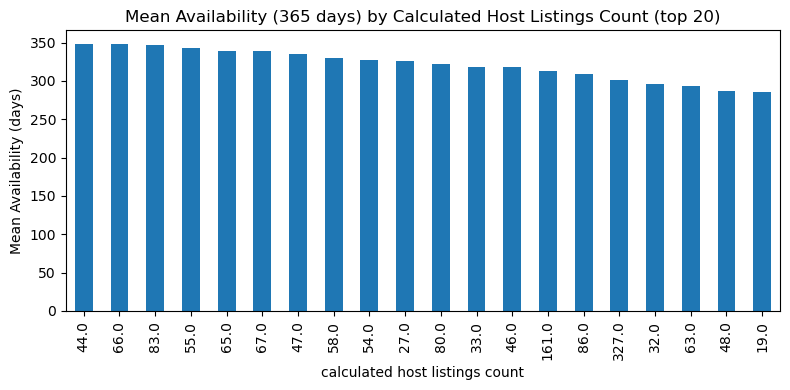

In [23]:

# 9) Are hosts with higher calculated host listings count more likely to maintain higher availability?
if 'calculated host listings count' in df.columns and 'availability 365' in df.columns:
    summary = df.groupby('calculated host listings count')['availability 365'].mean().sort_values(ascending=False).head(20)
    display(summary)
    plt.figure(figsize=(8,4))
    summary.plot(kind='bar')
    plt.title('Mean Availability (365 days) by Calculated Host Listings Count (top 20)')
    plt.ylabel('Mean Availability (days)')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for this comparison not found.")
